# Python-igraph编程实践基础教程：igraph官方手册使用解读

## igraph编程实践基础教程第08课：几种无监督图聚类和社区检测的方法

In [1]:
# !/usr/bin/python3
# -*- coding: utf-8 -*-
# Author ： 单哥的科研日常（公众号、B站）
# 示例程序所用库的版本：igraph==0.9.11

In [2]:
import igraph as ig
print(ig.__version__)

0.10.4


### 以著名的扎卡里空手道俱乐部网络为例

In [3]:
g = ig.Graph.Famous('Zachary')

### 基于网络边介数的社区检测（GN）
思想：连接两个社区的边的介数通常很高，因为在不同社区的节点之间的许多最短路径都要经过它们。因此，我们逐渐去除介数最高的边，并在每次去除后重新计算边介数。这样，网络迟早会变成独立的组件。聚类的结果将用树状图表示。

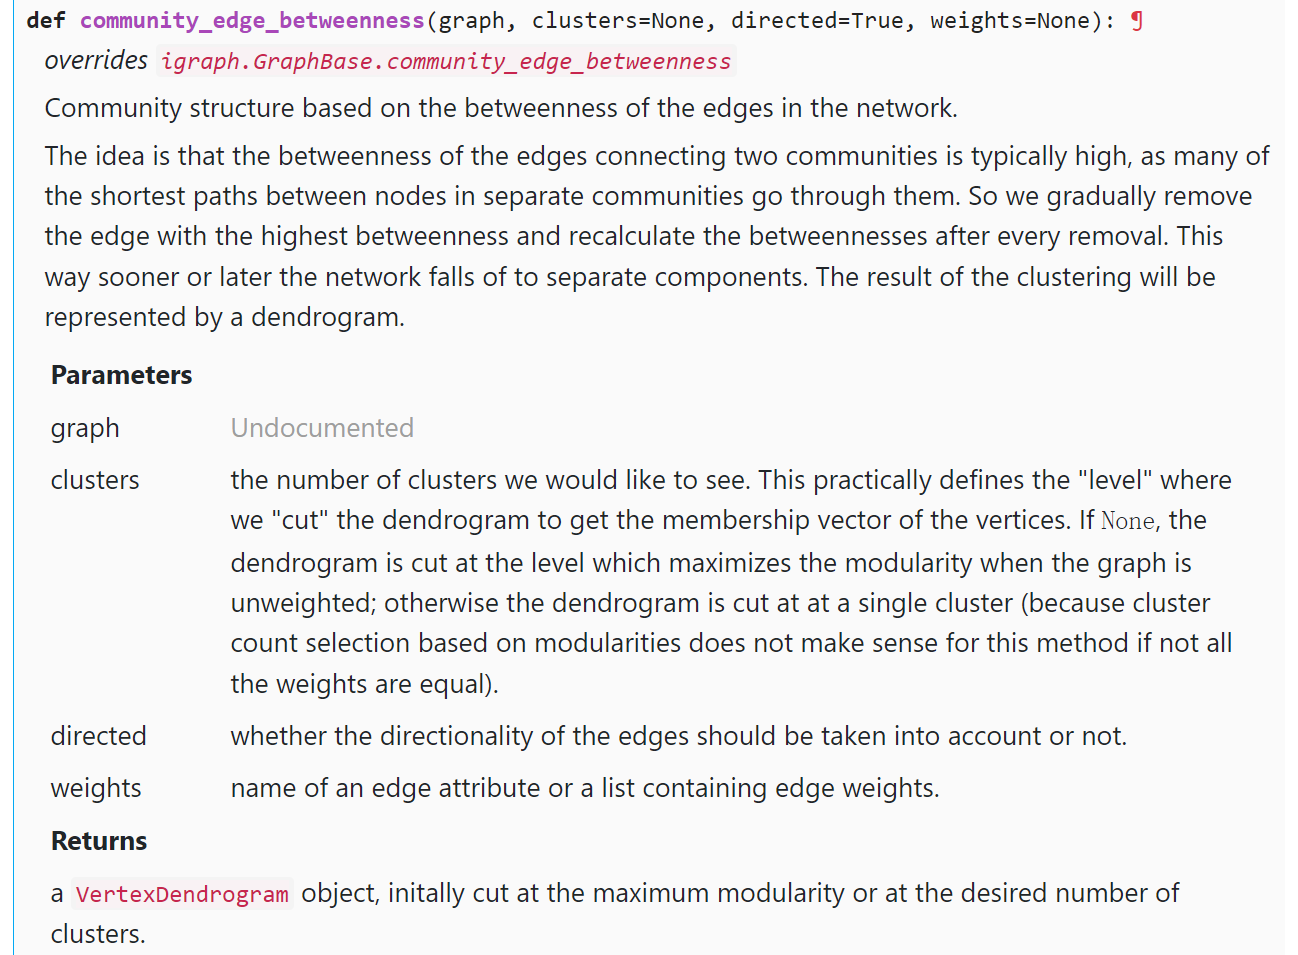

In [4]:
from IPython.display import Image
Image(filename = './attached files/community_edge_betweenness.png', width=600, height=400)

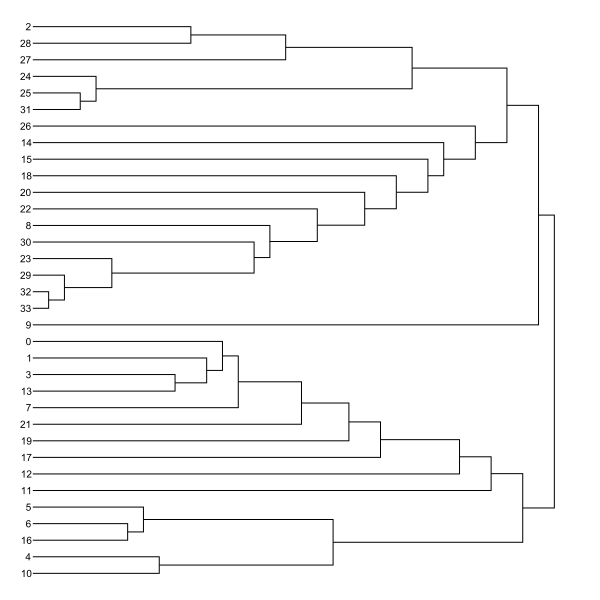

In [5]:
# 打印树状图
ig.plot(g.community_edge_betweenness())

In [6]:
# 输出最佳划分结果
com = g.community_edge_betweenness().as_clustering()
print(com)

Clustering with 34 elements and 5 clusters
[0] 0, 1, 3, 7, 11, 12, 13, 17, 19, 21
[1] 2, 24, 25, 27, 28, 31
[2] 4, 5, 6, 10, 16
[3] 8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33
[4] 9


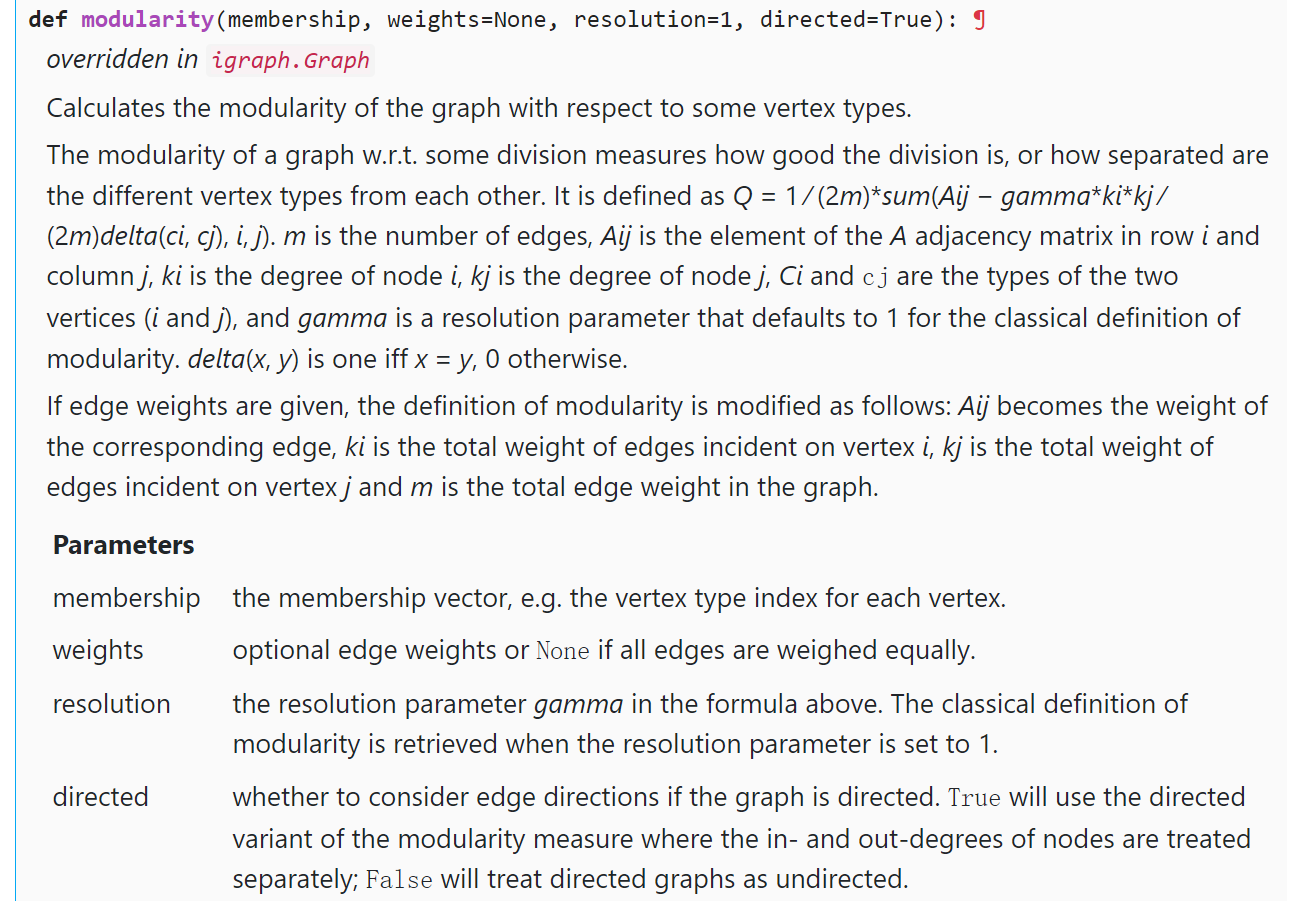

In [7]:
# 计算模块度
Image(filename = './attached files/modularity.png', width=600, height=400)

In [8]:
print(ig.Graph.modularity(g, com))

0.40129848783694944


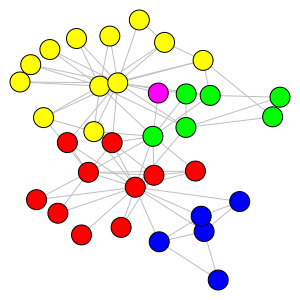

In [9]:
# 可视化网络
ig.plot(g.community_edge_betweenness().as_clustering(),
       vertex_size=20,
       edge_width=1,
       edge_color='grey',
       bbox=(300, 300)
       )

### 贪婪优化算法，简称CNM算法
A Clauset, MEJ Newman and C Moore: Finding community structure in very large networks. Phys Rev E 70, 066111 (2004).

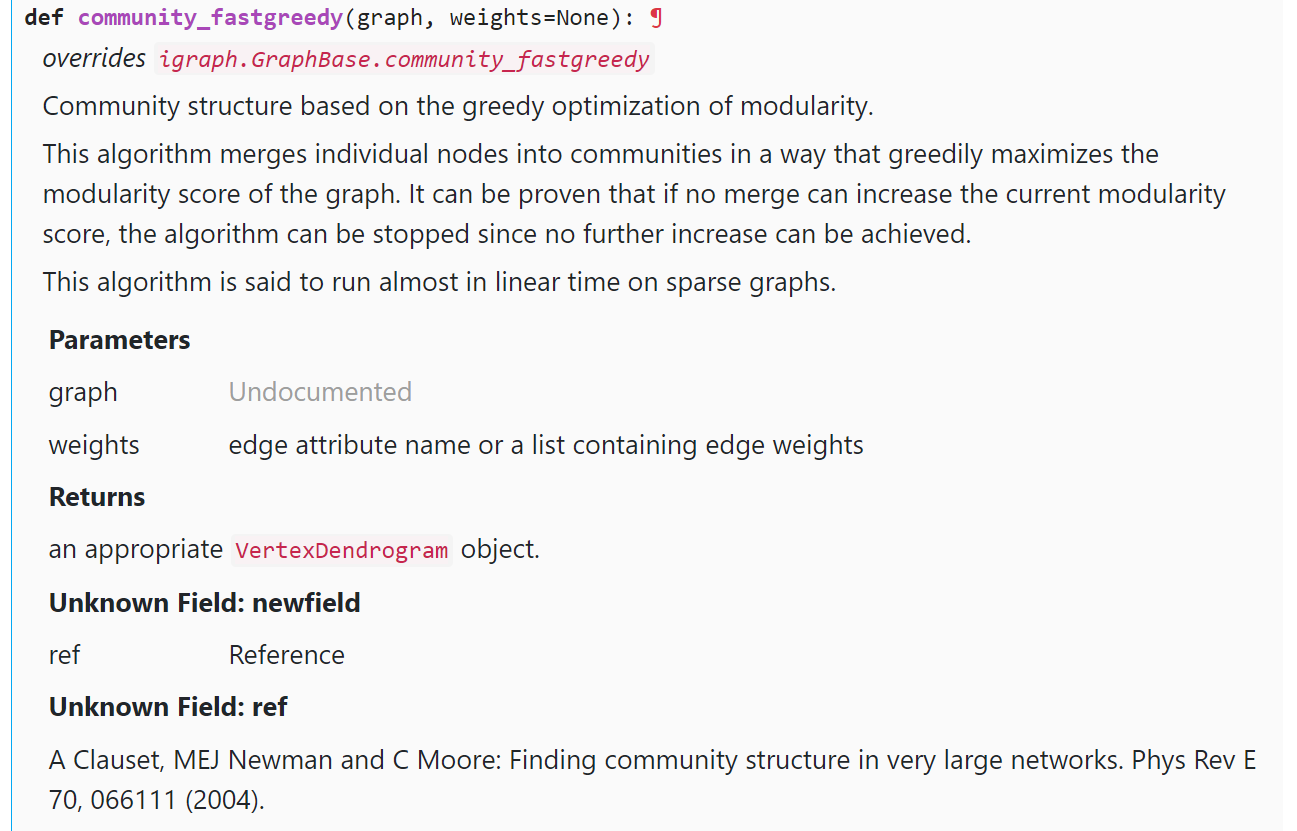

In [10]:
Image(filename = './attached files/community_fastgreedy.png', width=600, height=400)

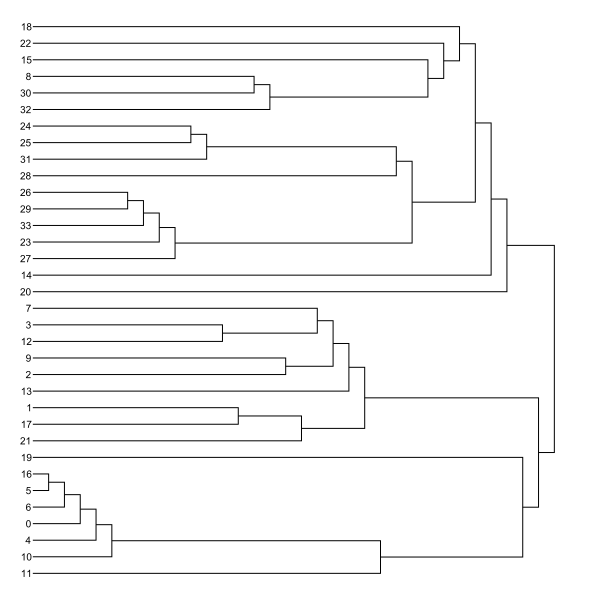

In [11]:
ig.plot(g.community_fastgreedy())

In [12]:
com = g.community_fastgreedy().as_clustering()
print(com)

Clustering with 34 elements and 3 clusters
[0] 0, 4, 5, 6, 10, 11, 16, 19
[1] 1, 2, 3, 7, 9, 12, 13, 17, 21
[2] 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33


In [13]:
print(ig.Graph.modularity(g, com))

0.38067061143984227


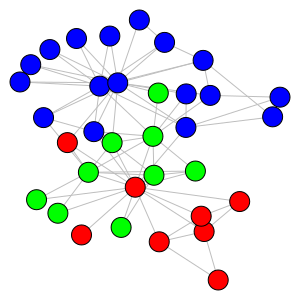

In [14]:
ig.plot(com,
       vertex_size=20,
       edge_width=1,
       edge_color='grey',
       bbox=(300, 300)
       )

### 根据Martin Rosvall和Carl T. Bergstrom的infommap方法找到网络的社区结构
M. Rosvall and C. T. Bergstrom: Maps of information flow reveal community structure in complex networks, PNAS 105, 1118 (2008).

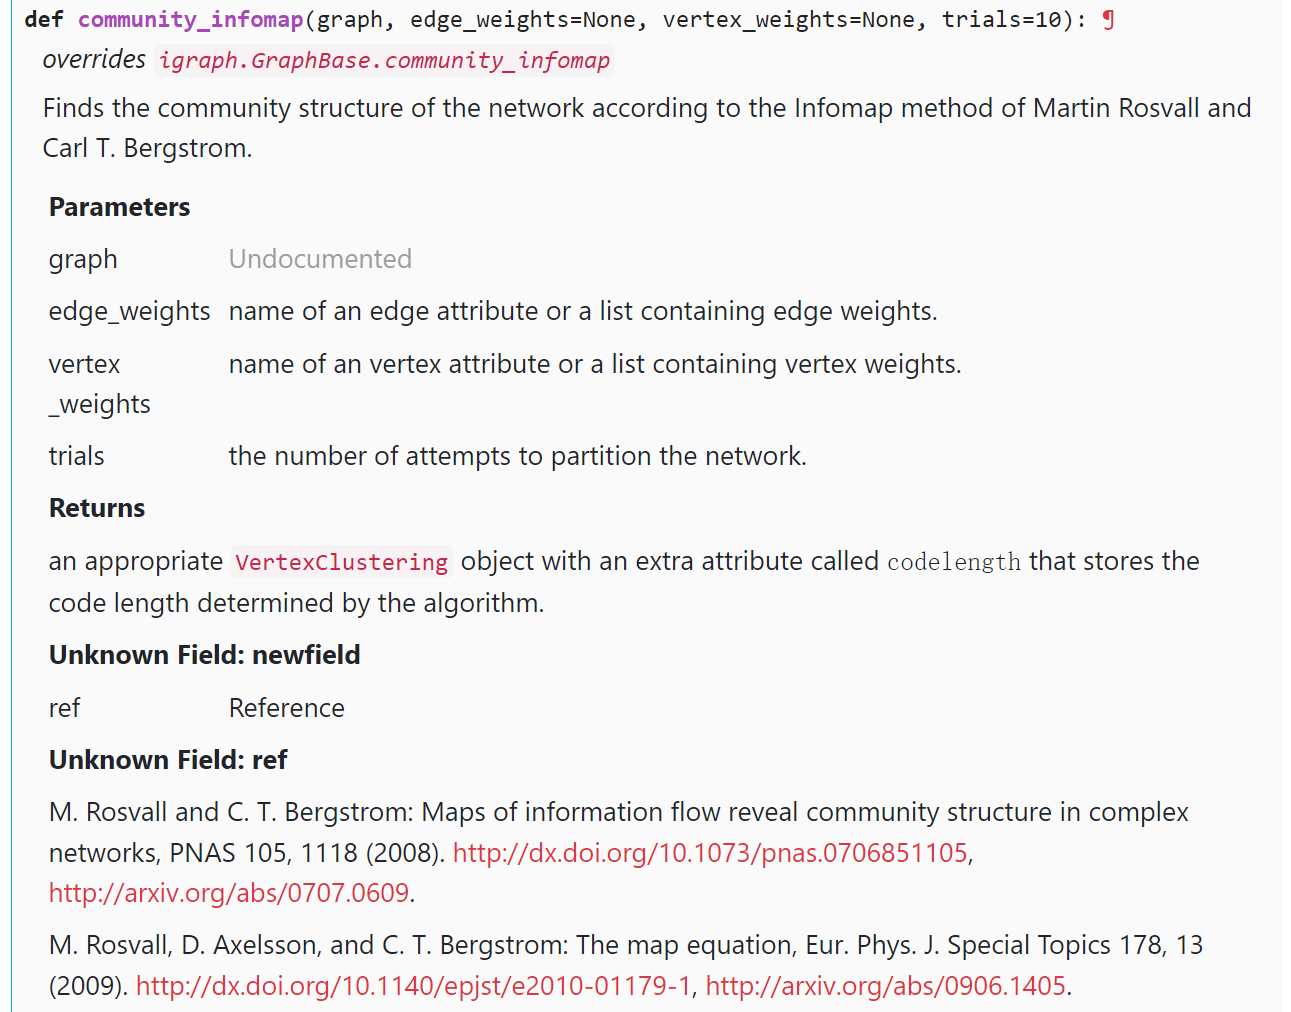

In [15]:
Image(filename = './attached files/community_infomap.png', width=600, height=400)

In [16]:
com = g.community_infomap()
print(com) # 这个算法返回的就是聚类结果，不是树状图

Clustering with 34 elements and 3 clusters
[0] 0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21
[1] 4, 5, 6, 10, 16
[2] 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33


In [17]:
print(ig.Graph.modularity(g, com))

0.40203813280736367


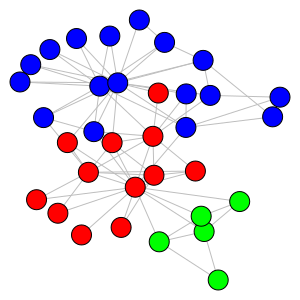

In [18]:
ig.plot(com,
       vertex_size=20,
       edge_width=1,
       edge_color='grey',
       bbox=(300, 300)
       )

### Louvain算法
VD Blondel, J-L Guillaume, R Lambiotte and E Lefebvre: Fast unfolding of community hierarchies in large networks, J Stat Mech P10008 (2008)

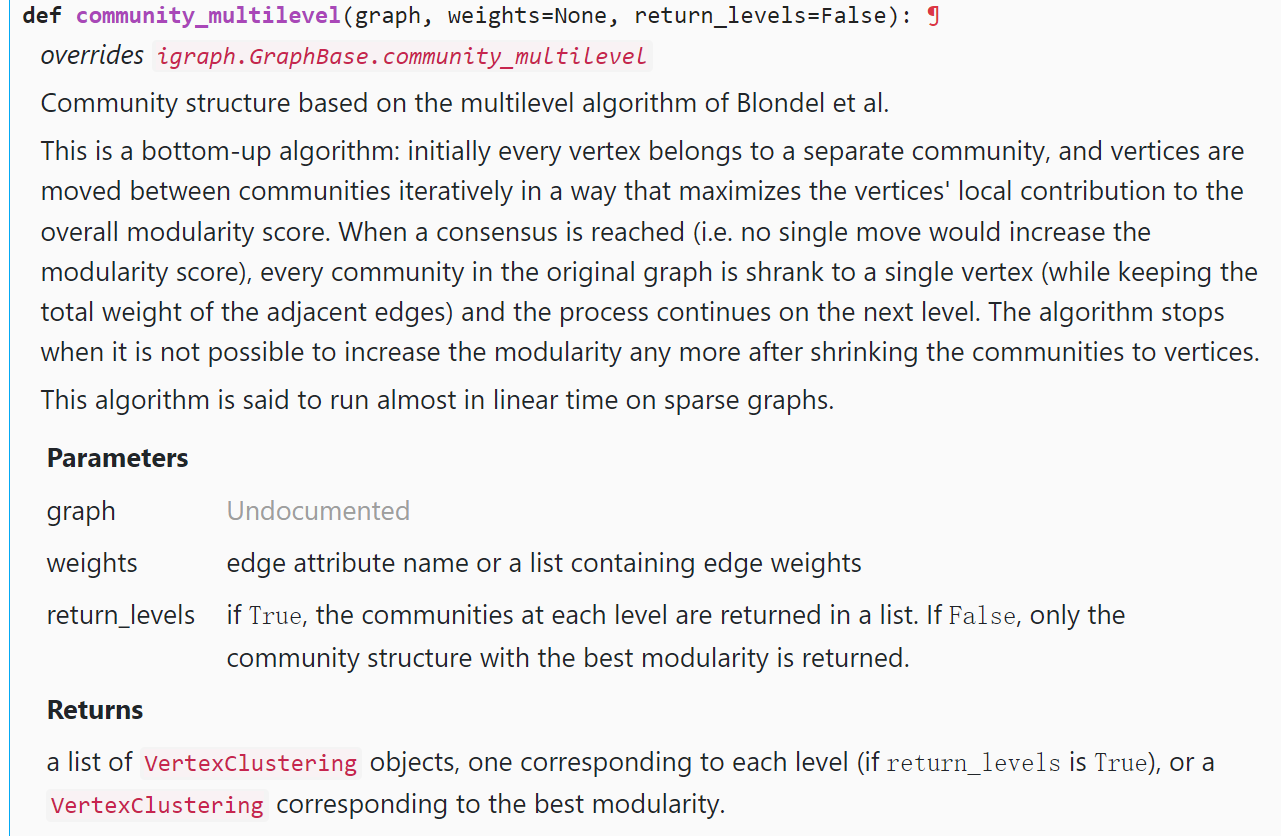

In [19]:
Image(filename = './attached files/Louvain.png', width=600, height=400)

In [20]:
com = g.community_multilevel()
print(com) # 这个算法返回的就是聚类结果，不是树状图

Clustering with 34 elements and 4 clusters
[0] 0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21
[1] 4, 5, 6, 10, 16
[2] 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30, 32, 33
[3] 24, 25, 28, 31


In [21]:
print(ig.Graph.modularity(g, com))

0.4151051939513478


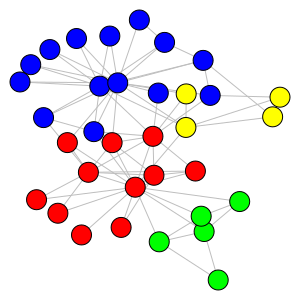

In [22]:
ig.plot(com,
       vertex_size=20,
       edge_width=1,
       edge_color='grey',
       bbox=(300, 300)
       )

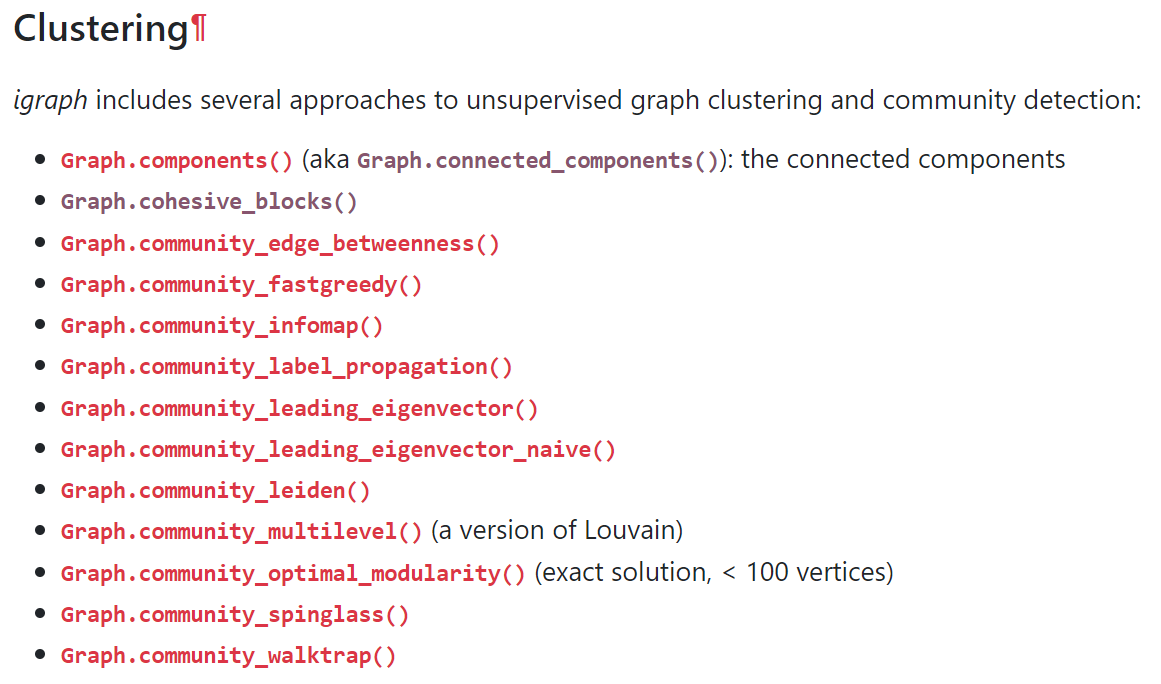

In [23]:
# 其他更多算法见下图：
Image(filename = './attached files/Clustering.png', width=600, height=400)